# Исследование объявлений о продаже квартир

**Цель исследования** - установить, какие параметры определяют рыночную стоимость объектов недвижимости. 

Необходимо ответить на ряд вопросов:
- Сколько в среднем занимает продажа квартиры?
- В каких населенных пунктах самая высокая и низкая стоимость жилья?
- Какие факторы больше всего влияют на стоимость квартиры? 
- Какие факторы влияют на стоимость квартиры в Санкт-Петербурге? Насколько сильно они отличаются от общих выводов по всей базе?

**Ход исследования**

Исходные данные - данные сервиса "Яндекс Недвижимость" — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки нужно исправить самые критичные ошибки данных, а также добавить недостающие показатели.

Таким образом, исследование пройдёт в четыре этапа:

- Обзор данных.
- Предобработка данных.
- Расчет необходимых показателей.
- Определение зависимостей и ответ на вопросы.

## Обзор данных

Импортируем библиотеки `pandas` и `matplotlib`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Читаем файл `real_estate_data.csv` и сохраняем его в переменной `data`:

In [2]:
try:
    data = pd.read_csv(r'C:\Users\м\Documents\Data\real_estate_data.csv', sep='\t', decimal=',')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

Выводим первые десять строк таблицы `data` на экран:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получаем общую информацию о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

В таблице 22 столбца. Согласно документации к данным:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Также похоже, что предполагаемый тип данных не во всех столбцах совпадает с реальным.

Нужно устранить проблемы в данных.

## Предобработка данных

### Работа с типами данных и пропусками

Посчитаем, сколько в таблице пропущенных значений:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Избавимся от пропущенных значений в некоторых столбцах. Например, для данных в столбце `balcony` логично предположить, что, если человек не указал число балконов — скорее всего, их нет. Заменим такие пропуски на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(value=0)

Такой же вывод можно сделать относительно данных в столбце `is_apartment` - если не указано, что это апартаменты, скорее всего, это не они. Согласно документации к данным в этом столбце должны быть значения булева типа, но из информации о таблице мы видим, что данные записаны в виде строк. Поменяем тип данных: 

In [7]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Теперь заполним пропущенные значения в столбце `is_apartment`:

In [8]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Прежде чем продолжать работу по устранению пропусков в данных, проверим, все ли остальные данные представлены правильными типами. Хотя на первый взгляд кажется, что данные представлены в виде чисел, вызов `info` демонстрирует, что в большинстве столбцов данные содержатся в строковом формате. Чтобы иметь возможность производить арифметические операции с данными, переведем их в нужные типы - `int` или `float`.

In [9]:
data[['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony']] = data[
    ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony']].apply(
    pd.to_numeric)  #применяем метод to_numeric к перечисленным столбцам  

Также применяем метод `to_numeric` к срезу столбцов: с `airports_nearest` по `days_exposition`:

In [10]:
data.loc[:, 'airports_nearest':'days_exposition'] = data.loc[:, 'airports_nearest':'days_exposition'].apply(pd.to_numeric)   

У нас остались неизмененными всего несколько столбцов. Количество фотографий, комнат и этаж представлены в виде `int`, все правильно; название населенного пункта - `object`, тоже все хорошо. А вот значения в столбце `first_day_exposition` нужно перевести в формат даты:

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, какие типы данных в датафрейме получились: 

In [12]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Вернемся к устранению пропусков в данных.
Попробуем избавиться от ряда пропущенных значений в столбце `kitchen_area` с помощью фильтра. Для квартир со свободной планировкой или студий, отметим, что площадь кухни равна 0. 

In [13]:
data['kitchen_area'] = data['kitchen_area'].where(~((data['studio'] == True) | (data['open_plan'] == True)),0)
data['kitchen_area'].isna().sum()       #проверим, сколько пропусков в столбце осталось  

2062

Теперь заполним пропуски в столбце `living_area` по медиане значений этого столбца, предварительно сгруппированных по количеству комнат:

In [14]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median')) 
data['living_area'].isna().sum()       #проверим, остались ли пропущенные значения в столбце

0

Достаточно много пропусков в столбце с высотой потолков ~30% от общего числа строк. Посмотрим на основные статистические данные:

In [15]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Судя по данным, максимальное значение высоты потолка - 100 метров. Сложно представить, что потолки такой высоты действительно существуют. Предположим, что максимально возможная высота - 4 метра. Взглянем, много ли значений превышает эту отметку. 

In [16]:
data[data['ceiling_height'] > 4]['ceiling_height'].count()

75

Таких значений оказалось 75, совсем немного относительно общего количества строк датафрейма. Можем их отбросить:

In [17]:
data = data.drop(data[data['ceiling_height'] > 4].index)      #перезаписываем датафрейм без выбивающихся значений 

Теперь пропущенные значения заменяем медианой по столбцу:

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()     #проверяем наличие пропусков

0

Заменим пропуски в столбце `days_exposition` на 0. Если в дальнейшем будем работать с этим столбцом, это поможет нам проследить закономерности.

In [19]:
data['days_exposition'] = data['days_exposition'].fillna(value=0)

Мы обработали часть пропусков в тех столбцах, данные в которые заносились вручную. Скорее всего, такие пропуски возникли либо по невнимательности пользователей, либо из-за отсутствия у них самих необходимой полной информации.
Однако в некоторых столбцах мы вынуждены оставить пустые значения - никак логически не получится заменить пропущенные значения в столбцах с площадью кухни, общим количеством этажей в доме и уж тем более с названием населенного пункта. 

Что касается столбцов с данными, полученными автоматически на основе картографических данных, можно предположить, что здесь пропуски возникли из-за отсутствия значений, соответствующих условиям (как с количеством парков, прудов и расстояниями до них), и из-за технических ошибок в расчетах (расстояние до аэропорта, центра города).   

## Подсчет и добавление новых значений в таблицу

Рассчитаем цену квадратного метра для квартиры в каждом объявлении и создадим новый столбец с этими данными:

In [20]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data.head()   #проверяем внесенные изменения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


В отдельные столбцы таблицы добавим день недели, месяц и год размещения объявления:

In [21]:
data['weekday'] = data['first_day_exposition'].dt.weekday       #находим день недели
data['month'] = data['first_day_exposition'].dt.month           #находим месяц 
data['year'] = data['first_day_exposition'].dt.year             #находим год
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Напишем функцию, которая будет разделять объявления в зависимости от этажа квартиры по трем типам: первый, последний, другой:

In [22]:
def floor_category(row):
    if row['floor'] == row['floors_total']:              #сравниваем этаж квартиры с количеством этажей в доме
        return 'Последний'
    if row['floor'] == 1:
        return 'Первый'
    return 'Другой'

Создадим в датафрейме отдельный столбец с типом этажа:

In [23]:
data['floor_type'] = data.apply(floor_category, axis=1)     #применяем созданную ранее функцию к таблице
data.head(10)                                               #выводим часть датафрейма на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,45.00,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.50,22,True,...,0.0,NaN,0.0,NaN,0.0,110544.692737,3,4,2019,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,Другой


Теперь рассчитаем соотношение жилой и общей площади и добавим результат в новый столбец:

In [24]:
data['living_to_total'] = data['living_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,Другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.283019
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000


То же самое проделаем с площадью кухни, найдем ее отношение к общей площади: 

In [25]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,0.0,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.283019,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000


## Исследовательский анализ данных

### Изучение параметров

Изучим площадь квартир с помощью гистограммы:

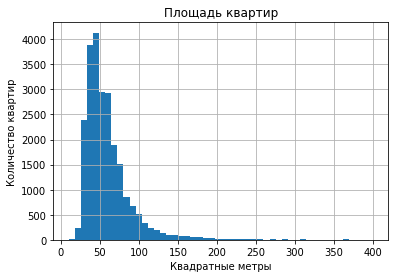

count    23624.000000
mean        60.180036
std         35.040518
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [26]:
plt.hist(data['total_area'], bins=50, range=(10,400))
plt.grid(True)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

data['total_area'].describe()

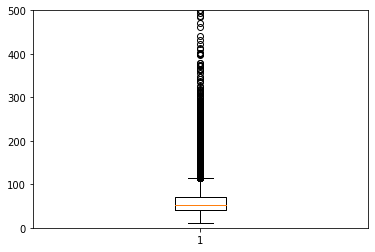

In [27]:
plt.boxplot(data['total_area'])              #также строим диаграмму размаха
plt.ylim(0,500);

Площадь большинства квартир из объявлений находится в промежутке от 40 до 70 квадратных метров. Медиана - 52 м2, среднее значение несколько больше (60 м2), потому что в данных присутствуют незначительные выбросы - квартиры с площадью 250, 350 и даже 900 квадратных метров. Судя по диаграмме размаха, можно отбросить все значения, что больше 120.

Изучим цену:

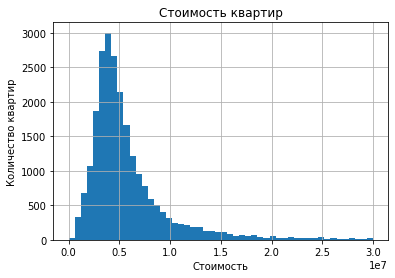

count    2.362400e+04
mean     6.494000e+06
std      1.071646e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.640000e+06
75%      6.755720e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [28]:
plt.hist(data['last_price'], bins=50, range=(0,30000000))
plt.grid(True)
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

data['last_price'].describe()

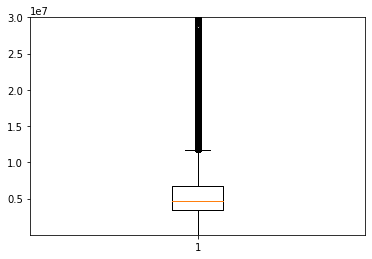

In [29]:
plt.boxplot(data['last_price'])             
plt.ylim(10000,30000000);

Цены на квартиры распределены главным образом в промежутке от 3,4 до 6,8 миллионов. Медианное значение - 4,6 млн. Есть выбросы в данных - как слишком маленькие значения (от 12 тыс), так и невероятно большие (до 763 млн). Чуть позже удалим значения, находящиеся за пределами усов (больше 12 млн). 

Теперь изучим количество квартир по числу комнат:

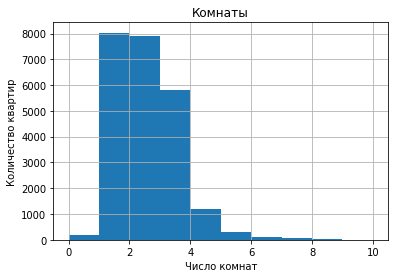

count    23624.000000
mean         2.068659
std          1.075892
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [30]:
plt.hist(data['rooms'], bins=10, range=(0,10))
plt.grid(True)
plt.title('Комнаты')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

data['rooms'].describe()

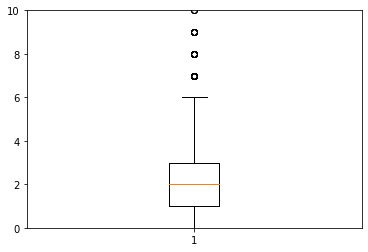

In [31]:
plt.boxplot(data['rooms'])             
plt.ylim(0,10);

Данные показывают нормальное распределение. Больше всего квартир с 1-3 комнатами. Но и здесь есть выбивающиеся значения с 6 комнатами и больше. Их мы и будем убирать.

И изучим высоту потолков:

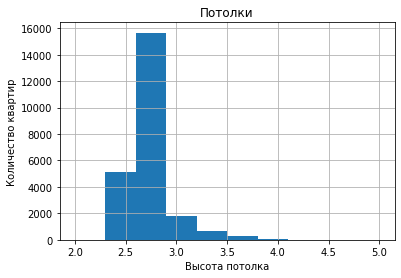

count    23624.000000
mean         2.693188
std          0.205278
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [32]:
plt.hist(data['ceiling_height'], bins=10, range=(2,5))
plt.grid(True)
plt.title('Потолки')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

data['ceiling_height'].describe()

В большинстве вариантов высота потолков составляет 2,6-2,7 метров. От выбросов мы избавились раньше.

В целом во всех данных встречаются аномально низкие и высокие значения. Их доля от общего числа незначительна, но для чистоты исследования в следующих пунктах мы избавимся от выбивающихся значений.

### Изучение времени продажи квартиры

Построим диаграмму на основе столбца `days_exposition`

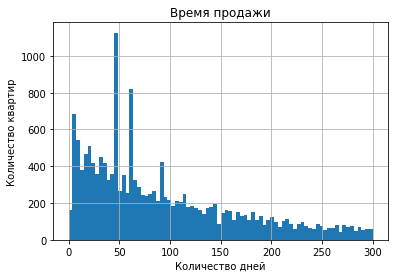

count    20457.000000
mean       180.631715
std        219.454221
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [33]:
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=80, range=(0,300))
plt.grid(True)
plt.title('Время продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

data.query('days_exposition != 0')['days_exposition'].describe()

Медиана времени продажи - 95 дней, среднее значение - 181 день. Межквартильный размах - от 45 до 231 дней, столько обычно занимет продажа. Все, что меньше или больше этого диапазона, можно считать слишком быстрой и слишкой медленной продажей соответственно. 

Среднее значение больше медианы почти в два раза, кроме того, очень велико стандартное отклонение. Построим диаграмму размаха, чтобы посмотреть подробнее.

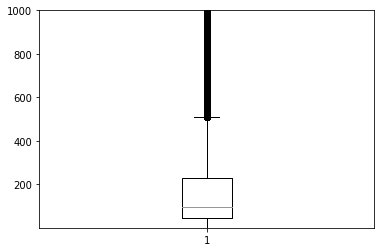

In [34]:
plt.boxplot(data[data['days_exposition'] != 0]['days_exposition'])
plt.ylim(1,1000);

Согласно диаграмме размаха все значения больше ~500 дней являются выбросами. 500 дней - это почти полтора года, вряд ли кто-то продает квартиру столько времени и дольше. К тому же, таких значений меньше 10% от общего числа, можем смело избавиться от них. 

Также на гистограмме мы видим несколько аномальных пиков. С помощью `value_counts` посмотрим, на каких значениях возникают пики.  

In [35]:
data[data['days_exposition'] != 0]['days_exposition'].value_counts()

45.0      880
60.0      537
7.0       233
30.0      207
90.0      204
         ... 
969.0       1
1147.0      1
1148.0      1
1345.0      1
1174.0      1
Name: days_exposition, Length: 1140, dtype: int64

Итак, пики наблюдаются на значениях 7, 30, 45, 60 и 90 дней. Можно предположить, что это сроки, после которых на сервисе происходит автоматическое снятие объявления (если оно не продлевается вручную). Всего в сумме таких значений не очень много, поэтому мы их тоже не будем включать в итоговую выборку.    

### Работа с редкими и выбивающимися значениями

Формируем срез без выбивающихся значений столбца `days_exposition`.

In [36]:
good_data = data.query('days_exposition < 500 and days_exposition != 0 and days_exposition != 7 and days_exposition != 30 \
and days_exposition != 45.00000000000001 and days_exposition != 60 and days_exposition != 90.00000000000001')

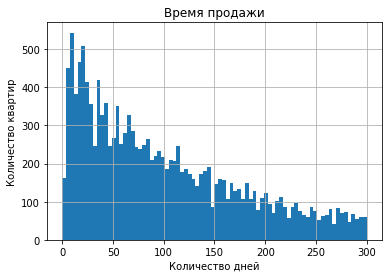

count    16651.000000
mean       136.745901
std        122.373395
min          1.000000
25%         40.000000
50%         98.000000
75%        198.000000
max        499.000000
Name: days_exposition, dtype: float64

In [37]:
plt.hist(good_data['days_exposition'], bins=80, range=(0,300))
plt.grid(True)
plt.title('Время продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

good_data['days_exposition'].describe()

Теперь данные выглядят гораздо более равномерно.

Уберем также аномальные значения, которые мы обнаружили ранее:

In [38]:
good_data = good_data.query('total_area < 120')
good_data = good_data.query('last_price < 12000000')
good_data = good_data.query('rooms < 6')                #формируем новый срез на каждом условии

Сравним основные показатели первоначального датасета и отфильтрованного.

In [39]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_to_total,kitchen_to_total
count,23624.000000,2.362400e+04,23624.000000,23624.000000,23624.000000,23538.000000,23624.000000,23624.000000,21573.000000,23624.000000,...,8042.000000,18120.000000,9072.000000,23624.000000,2.362400e+04,23624.000000,23624.000000,23624.000000,23624.000000,21573.000000
mean,9.853835,6.494000e+06,60.180036,2.068659,2.693188,10.685062,34.219280,5.895234,10.449267,0.590374,...,490.904004,0.768764,518.148038,156.416483,9.925669e+04,2.569506,6.398916,2017.367465,0.563739,0.185546
std,5.679276,1.071646e+07,35.040518,1.075892,0.205278,6.596081,21.339876,4.886268,5.936538,0.958325,...,342.660889,0.937153,277.859443,213.287181,4.977681e+04,1.789496,3.491298,1.039479,0.110841,0.074920
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,22.000000,7.656653e+04,1.000000,3.000000,2017.000000,0.490251,0.132653
50%,9.000000,4.640000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,...,454.000000,1.000000,502.000000,74.000000,9.498379e+04,3.000000,6.000000,2017.000000,0.566433,0.171429
75%,14.000000,6.755720e+06,69.700000,3.000000,2.700000,16.000000,42.600000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,198.000000,1.141418e+05,4.000000,10.000000,2018.000000,0.638265,0.230978
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.514286,0.787879


In [40]:
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_to_total,kitchen_to_total
count,15502.000000,1.550200e+04,15502.000000,15502.000000,15502.000000,15443.000000,15502.000000,15502.000000,14413.000000,15502.000000,...,4894.000000,11853.000000,5630.000000,15502.000000,15502.000000,15502.000000,15502.000000,15502.000000,15502.000000,14413.000000
mean,9.692298,4.755874e+06,52.063655,1.881306,2.666771,11.014505,29.690926,6.020578,9.438965,0.593278,...,485.232530,0.695098,536.383659,133.801897,92185.548822,2.585537,6.624694,2017.339376,0.562631,0.189388
std,5.519314,2.123122e+06,17.760163,0.880426,0.165369,6.672830,12.670861,4.953004,3.829938,0.933110,...,323.296805,0.880570,275.747333,121.055674,28213.483874,1.784067,3.469391,0.852655,0.107663,0.073029
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,16.000000,1.000000,111.834862,0.000000,1.000000,2015.000000,0.038462,0.000000
25%,6.000000,3.300000e+06,38.200000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,324.000000,39.000000,75757.575758,1.000000,3.000000,2017.000000,0.489567,0.136476
50%,9.000000,4.300000e+06,48.000000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,526.000000,95.000000,92502.927400,3.000000,7.000000,2017.000000,0.564419,0.177083
75%,13.000000,5.800000e+06,62.300000,3.000000,2.650000,16.000000,38.000000,8.000000,11.000000,1.000000,...,612.000000,1.000000,747.750000,193.000000,108333.333333,4.000000,10.000000,2018.000000,0.635417,0.235372
max,50.000000,1.199900e+07,119.600000,5.000000,4.000000,60.000000,100.000000,32.000000,50.000000,5.000000,...,3190.000000,3.000000,1344.000000,499.000000,312240.000000,6.000000,12.000000,2019.000000,1.514286,0.787879


Датасет стал меньше, но в нем осталось более 65% значений от первоначального набора. Критической разницы в статистических характеристиках нет, значит, мы не убрали ничего принципиально важного. Изменения, в основном, коснулись медианы и стандартного отклонения - они уменьшились.
Теперь, когда отброшены значения, выходящие за пределы 1,5 межквартильного размаха, данные стали чище и приближеннее к реальности.

### Изучение факторов, влияющих на стоимость квартиры

Изучим зависимость цены от общей площади жилья.

0.7113936921513456

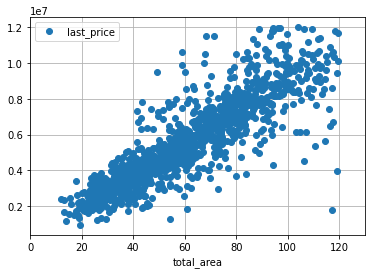

In [41]:
(
    good_data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(6,4), xlim=(0,130))
)

good_data['total_area'].corr(good_data['last_price'])    #считаем корреляцию

**Вывод:** зависимость цены от площади достаточно сильная. Как правило, чем больше площадь квартиры, тем выше стоимость, но так бывает не всегда.  

Изучим зависимость цены от общего числа комнат.

0.45432977580836464

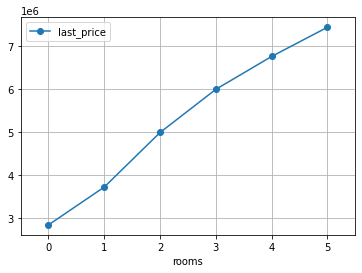

In [42]:
(
    good_data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-0.5,5.5))
)

good_data['rooms'].corr(good_data['last_price'])    #считаем корреляцию

**Вывод:** зависимость цены от количества комнат слабая. Чем больше комнат, там стоимость немного выше. Можно предположить, что зависимость не самая сильная потому, что есть как квартиры с очень большими по площади комнатами, так и с очень маленькими.

Изучим зависимость стоимости квартиры от удаленности от центра.

-0.3421801082260167

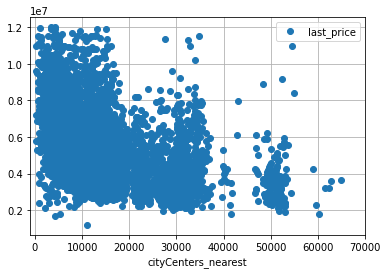

In [43]:
(
    good_data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(6,4), xlim=(-1000,70000))
)

good_data['cityCenters_nearest'].corr(good_data['last_price'])    #считаем корреляцию

**Вывод:** Существует небольшая связь между стоимостью квартиры и ее удаленностью от центра города. Коэффициент корреляции принимает отрицательное значение, то есть чем меньше расстояние до центра, тем дороже квартиры. Конечно, в центре много дешевых вариантов тоже.

Изучим зависимость цены от этажа, на котором расположена квартира.

,last_price
floor_type,
Другой,4.933139e+06
Первый,4.010263e+06
Последний,4.451349e+06


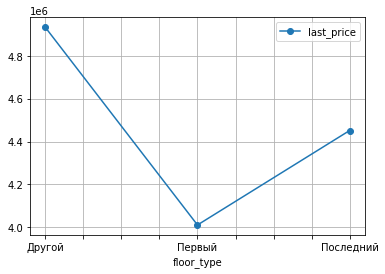

In [44]:
(
    good_data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-0.1,2.1))
)

good_data.pivot_table(index='floor_type', values='last_price')

**Вывод:** Как показывают данные, квартиры на первом этаже, в среднем, самые дешевые. Квартиры на последнем этаже подороже. Выше всего стоимость у квартир, расположенных не на первом и не на последнем этаже.

Изучим связь цены и дня недели размещения объявления.

,last_price
weekday,
0,4.760694e+06
1,4.773476e+06
2,4.742794e+06
3,4.820667e+06
4,4.738985e+06
5,4.680079e+06
6,4.694243e+06


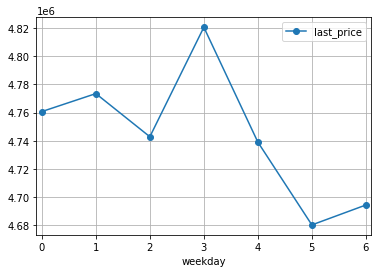

In [45]:
(
    good_data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-0.1,6.1))
)

good_data.pivot_table(index='weekday', values='last_price')

**Вывод:** Дороже всего квартиры, объявления о которых были размещены в четверг, а дешевле всего - на выходных - в субботу и воскресенье.

Изучим связь цены и месяца размещения объявления.

,last_price
month,
1,4.810553e+06
2,4.805323e+06
3,4.662995e+06
4,4.773464e+06
5,4.816161e+06
6,4.619764e+06
7,4.701256e+06
8,4.825820e+06
9,4.827270e+06


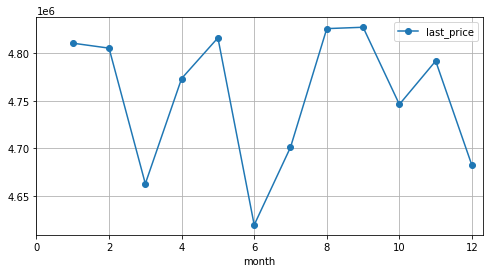

In [46]:
(
    good_data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(8,4), xlim=(0,12.3))
)

good_data.pivot_table(index='month', values='last_price')

**Вывод:** Дешевле всего квартиры, выставленные на продажу в июне, марте и декабре. Дороже всего - в сентябре, августе и мае.

Изучим связь цены и года размещения объявления.

,last_price
year,
2015,4.880285e+06
2016,4.744919e+06
2017,4.729810e+06
2018,4.738373e+06
2019,5.027596e+06


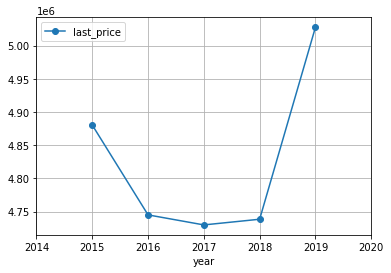

In [47]:
(
    good_data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(2014,2020))
)

good_data.pivot_table(index='year', values='last_price')

В 2016-2018 годах наблюдалось падение цен на квартиры. А в 2019 году цены резко выросли.

### Сравнение стоимости квадратного метра в 10 населенных пунктах

Сравним стоимость квадратного метра жилья в 10 населенных пунктах с наибольшим числом объявлений.

In [48]:
#создаем переменную, в которую входят топ-10 населенных пунктов по количеству объявлений 
#создаем сводную таблицу с этими населенными пунктами и средней ценой за квадратный метр в каждом из них
#выводим таблицу на экран, отсортировав по убыванию цены
locality_top = good_data['locality_name'].value_counts().head(10)
price_in_locality = good_data.query('locality_name in @locality_top.index').pivot_table(index='locality_name', 
                                                                                        values='price_per_meter')
price_in_locality.sort_values(by='price_per_meter', ascending=False)   

,price_per_meter
locality_name,
Санкт-Петербург,104332.266800
Пушкин,99648.193552
деревня Кудрово,92328.024486
посёлок Парголово,89627.414098
посёлок Мурино,85896.778643
посёлок Шушары,78140.675499
Колпино,74793.322033
Гатчина,67649.078953
Всеволожск,66490.156717


**Вывод:** самая высокая средняя стоимость квадратного метра жилья, как и стоило ожидать, - в Санкт-Петербурге. Самая низкая стоимость(среди десяти самых популярных населенных пунктов) - в Выборге, что можно объяснить большой удаленностью от Санкт-Петербурга.

### Определение границ центральной зоны

Определим, на каком расстоянии от центра города в Санкт-Петербурге, заканчивается центральная зона. 

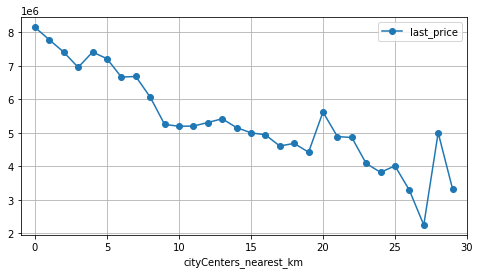

In [49]:
#создаем новый столбец с расстоянием до центра в км
#заполняем пустые значения маркером, чтобы перевести значения столбца в целочисленный тип 

good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest'] / 1000
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].fillna(999999)
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].astype('int64')

#создаем график, выбрав только объявления из Санкт-Петербурга 

(
    good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 999999')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(8,4), xlim=(-1,30))
);

Определим, что центральная зона ограничивается 7 км, дальше цена начинает падать. 

### Анализ сегмента квартир в центре

Вынесем в отдельную переменную объявления, соответствующие условиям: 1)квартира находится в Санкт-Петербурге, 2)квартира находится на расстоянии не больше 7 км от центра.

In [50]:
spb_center_data = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 7')

Проанализируем площадь квартир:

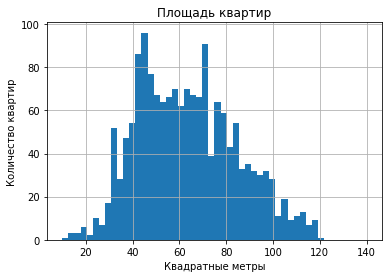

count    1641.000000
mean       63.541773
std        21.256922
min        12.000000
25%        46.300000
50%        62.000000
75%        78.000000
max       119.600000
Name: total_area, dtype: float64

In [51]:
plt.hist(spb_center_data['total_area'], bins=50, range=(10,140))
plt.grid(True)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

spb_center_data['total_area'].describe()

Среднее значение площади квартир в центре Санкт-Петербурга - 63,5 м2, медиана - 62 м2. Эти значения немного выше аналогичных показателей по всей базе.

Изучим стоимость:

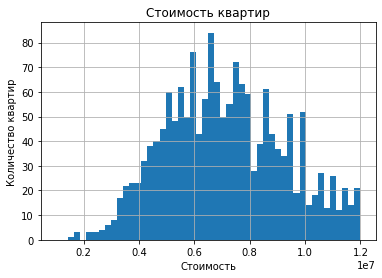

count    1.641000e+03
mean     7.131971e+06
std      2.150204e+06
min      1.600000e+06
25%      5.500000e+06
50%      6.985230e+06
75%      8.600000e+06
max      1.199900e+07
Name: last_price, dtype: float64

In [52]:
plt.hist(spb_center_data['last_price'], bins=50, range=(1000000,12000000))
plt.grid(True)
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

spb_center_data['last_price'].describe()

Медианное значение цены - 7 млн, среднее - 7,1 млн. Это выше значений, полученных из анализа всех объявлений в базе.

Изучим число квартир по количеству комнат:

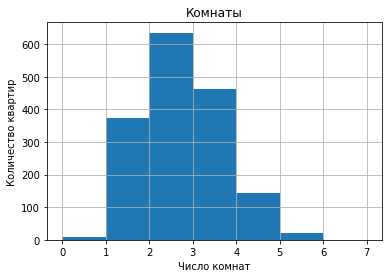

count    1641.000000
mean        2.255332
std         0.962725
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

In [53]:
plt.hist(spb_center_data['rooms'], bins=7, range=(0,7))
plt.grid(True)
plt.title('Комнаты')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

spb_center_data['rooms'].describe()

Больше всего квартир с 1, 2 и 3 комнатами. Здесь нет никаких особенностей.

Изучим высоту потолков:

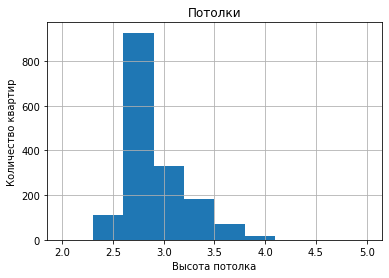

count    1641.000000
mean        2.852931
std         0.298721
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max         4.000000
Name: ceiling_height, dtype: float64

In [54]:
plt.hist(spb_center_data['ceiling_height'], bins=10, range=(2,5))
plt.grid(True)
plt.title('Потолки')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

spb_center_data['ceiling_height'].describe()

В большей части квартир потолки высотой 2,6-3 метров. Примерно соответствует показателям по всей базе.

Теперь посмотрим на зависимости. Влияние числа комнат на стоимость жилья:

0.4471052317779012

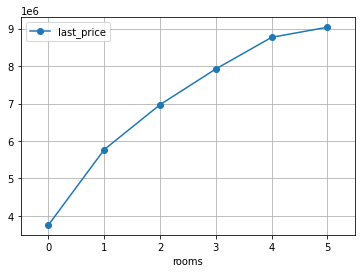

In [55]:
(
    spb_center_data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-0.5,5.5))
)

spb_center_data['rooms'].corr(spb_center_data['last_price'])    #считаем корреляцию

Зависимость примерно та же, что и в общей выборке - чем больше комнат, там стоимость немного выше.

Теперь посмотрим на тип этажа:

,last_price
floor_type,
Другой,7.353270e+06
Первый,5.850915e+06
Последний,7.264187e+06


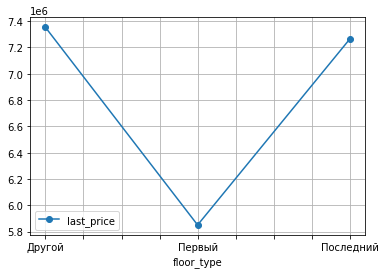

In [56]:
(
    spb_center_data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-0.1,2.1))
)

spb_center_data.pivot_table(index='floor_type', values='last_price')

Здесь тоже видим такую же картину, как в общей выборке - дешевле всего продаются квартиры на первом этаже. Однако что касается квартир на последнем этаже, тут их цена сопоставима с ценой квартир на всех других этажах (кроме первого). 

Изучим связь цены и удаленности квартиры от центра:

-0.12923319327466512

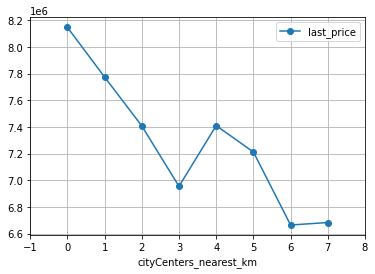

In [57]:
(
    spb_center_data.pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-1,8))
)

spb_center_data['cityCenters_nearest_km'].corr(good_data['last_price'])    #считаем корреляцию

Коэффициент корреляции примерно такой же как при работе со всей выборкой. Существует небольшая связь между стоимостью квартиры и ее удаленностью от центра города - чем меньше расстояние до центра, тем дороже квартиры, но не всегда.

Изучим связь цены от даты размещения объявления:

,last_price
weekday,
0,7.080270e+06
1,7.121208e+06
2,7.031616e+06
3,7.066321e+06
4,7.264435e+06
5,7.162609e+06
6,7.382802e+06


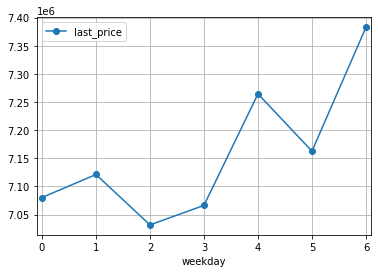

In [58]:
#день недели
(
    spb_center_data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(-0.1,6.1))
)

spb_center_data.pivot_table(index='weekday', values='last_price')

Если в общей базе объявления с самыми высокими ценами на квартиры были выставлены в четверг, а с самыми низкими - в выходные, здесь ситуация противоположная. Дни с минимальной средней ценой - понедельник, среда, четверг. С максимальной средней ценой - воскресенье.

,last_price
month,
1,7.468922e+06
2,7.152931e+06
3,7.263855e+06
4,6.951796e+06
5,7.022822e+06
6,6.953548e+06
7,7.075683e+06
8,7.152326e+06
9,7.410359e+06


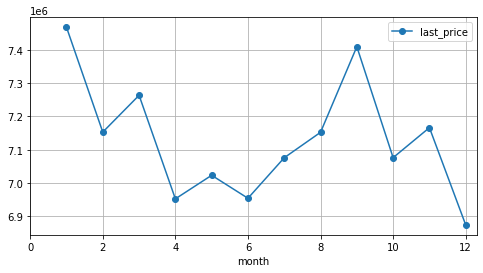

In [59]:
#месяц
(
    spb_center_data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(8,4), xlim=(0,12.3))
)

spb_center_data.pivot_table(index='month', values='last_price')

Ситуация схожа с общей выборкой - дешевле всего квартиры, выставленные на продажу в декабре, апреле и июне. Дороже всего - в январе и сентябре.

,last_price
year,
2015,6.698017e+06
2016,7.114026e+06
2017,7.175419e+06
2018,7.150643e+06
2019,6.971456e+06


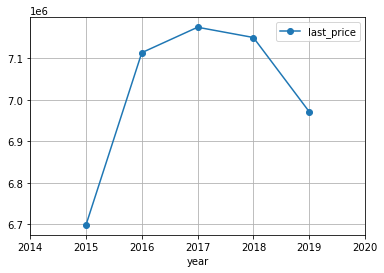

In [60]:
#год
(
    spb_center_data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(6,4), xlim=(2014,2020))
)

spb_center_data.pivot_table(index='year', values='last_price')

А здесь, в отличии от снижения стоимости квартир в 2016 году, которое мы наблюдали при анализе всех объявлений, произошел резкий рост цен. Небольшое снижение произошло только в 2019 году.  

## Общий вывод

Мы изучили большой объем данных, представляющий собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, и ответили на поставленные вопросы.

**Время продажи квартиры**

Чаще всего квартиры продают в срок от 1,5 до 6,5 месяцев. Однако в данных присутствовали и объявления старше трех лет. Быстрой продажей квартиры может считаться продажа менее чем за 45 дней, а долгой - больше чем за 230 дней.

**Стоимость жилья**

Среди самых популярных (по количеству объявлений) насленнных пунктов самая высокая стоимость жилья за квадратный метр - в Санкт-Петербурге(104332), самая низкая - в Выборге(56953).

**Факторы, влияющие на стоимость жилья**

Больше всего на стоимость влияет площадь квартиры и этаж, на котором она расположена. Чем больше общая площадь жилья, тем больше цена. Ниже всего цена на квартиры, расположенные на первом этаже. В меньшей степени на стоимость влияют число комнат и расстояние до центра города.

**Факторы, влияющие на стоимость жилья в Санкт-Петербурге**

Помимо вышеперечисленных факторов, которые справедливы и для центра Санкт-Петербурга, в этом районе есть свои особенности. Так, в центре Петербурга цены на квартиры на последнем этаже почти на таком же высоком уровне, как на квартиры на других этажах (за исключением первого). Также интересно, что в 2016 году в Санкт-Петербурге не было снижения цен на недвижимость, напротив, цены сильно выросли. Средняя площадь квартиры и средняя ее цена в центре Санкт-Петербурга немного выше, чем в целом по выборке. 

**Параметры**

Мы изучили такие характеристики как площадь, цена, число комнат и высота потолков и определили, что в данных есть выбивающиеся значения. Для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность, предлагаем установить следующие параметры: площадь квартир - до 120 м2, цена - не превышает 12 млн, число комнат - не больше 6, высота потолков - до 4 м. 